/tmp/ipykernel_1307031/3686797903.py:7: RuntimeWarning: overflow encountered in exp
  numerator = np.sum(np.exp(scaling_factor * energies))
/tmp/ipykernel_1307031/3686797903.py:8: RuntimeWarning: overflow encountered in scalar power
  denominator = np.sum(np.exp(energies))**scaling_factor
/tmp/ipykernel_1307031/3686797903.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.log(numerator / denominator)
/tmp/ipykernel_1307031/3686797903.py:9: RuntimeWarning: divide by zero encountered in log
  return np.log(numerator / denominator)
/home/ubuntu/nethome-blazejb/minimol/.minimol_p3-12/lib/python3.12/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


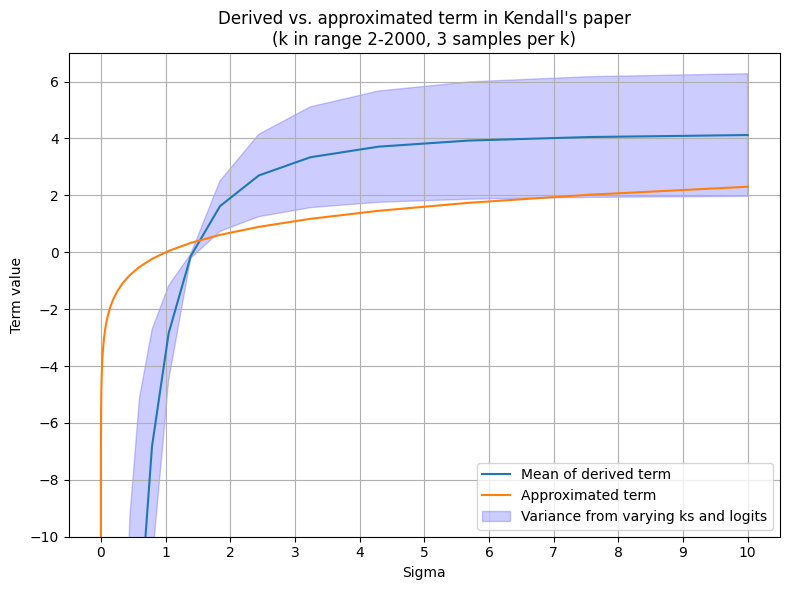

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def reg_term(energies, sigma):
    scaling_factor = 2 / sigma**2
    numerator = np.sum(np.exp(scaling_factor * energies))
    denominator = np.sum(np.exp(energies))**scaling_factor
    return np.log(numerator / denominator)

sigmas = np.logspace(-5, 1, 50)
ks = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
num_samples_per_k = 3
derived_curves = []

for k in ks:
    for _ in range(num_samples_per_k):
        logits = np.random.randn(k)
        derived_terms = [reg_term(logits, sigma) for sigma in sigmas]
        derived_curves.append(derived_terms)

derived_curves = np.array(derived_curves)

mean_derived = np.mean(derived_curves, axis=0)
var_derived = np.var(derived_curves, axis=0)

plt.figure(figsize=(8, 6))
plt.plot(sigmas, mean_derived, label='Mean of derived term')

approximated_terms = np.log(sigmas)
plt.plot(sigmas, approximated_terms, label='Approximated term')

plt.fill_between(
    sigmas, mean_derived - np.sqrt(var_derived), mean_derived + np.sqrt(var_derived),
    color='blue', alpha=0.2, label='Variance from varying ks and logits')

plt.ylim(-10, 7)
plt.xlabel('Sigma')
plt.xticks(np.arange(max(sigmas) + 1))
plt.ylabel('Term value')
plt.title('Derived vs. approximated term in Kendall\'s paper\n(k in range 2-2000, 3 samples per k)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1307031/4257590587.py:10: RuntimeWarning: invalid value encountered in log
  loss_values_sigma = np.log(kendalls_loss_sigma(L_grid_sigma, sigma_grid))
/tmp/ipykernel_1307031/4257590587.py:18: RuntimeWarning: invalid value encountered in log
  loss_values_weight = np.log(kendalls_loss_weight(L_grid_weight, weight_grid))


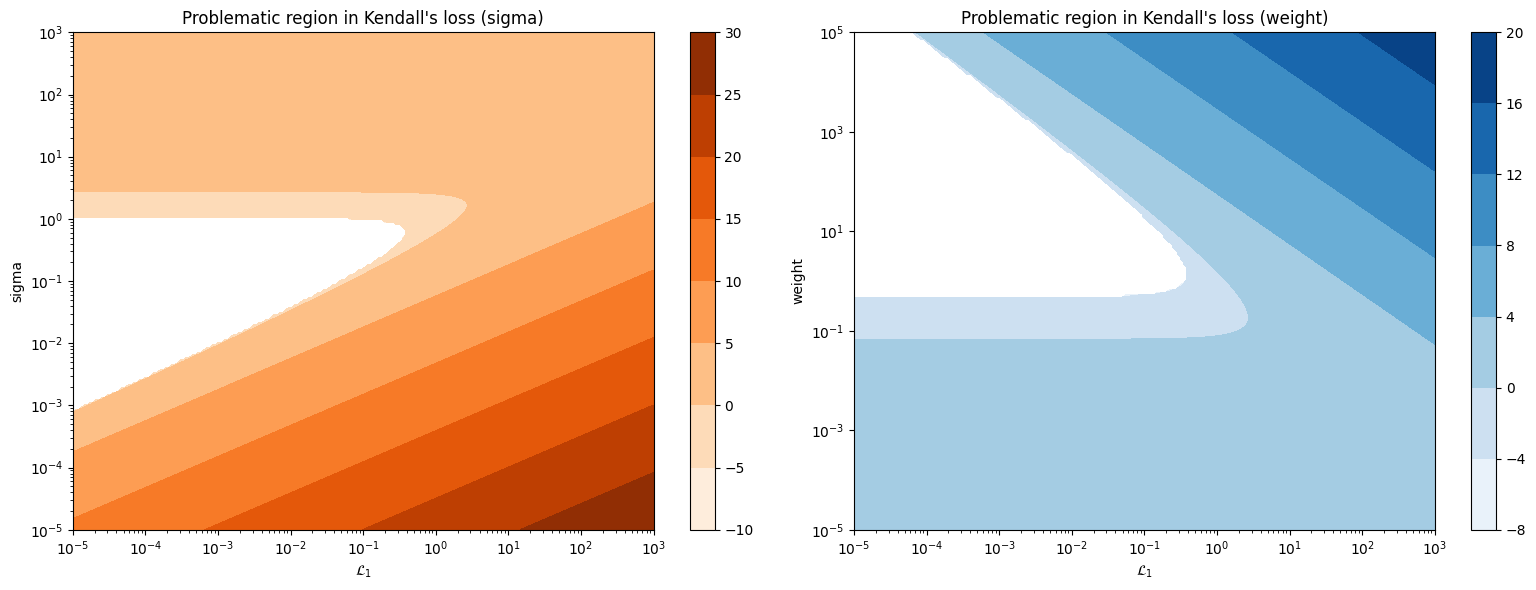

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = np.logspace(-5, 3, 200)

# figure with sigma
sigma = np.logspace(-5, 3, 200)
L_grid_sigma, sigma_grid = np.meshgrid(L, sigma)
kendalls_loss_sigma = lambda loss, std: (1 / (2 * (std**2))) * loss + np.log(std)
loss_values_sigma = np.log(kendalls_loss_sigma(L_grid_sigma, sigma_grid))

# figure with weight
# weight = 1 / (2 * sigma^2)
# So, sigma = sqrt(1 / (2 * weight))
weight = np.logspace(-5, 5, 200)
L_grid_weight, weight_grid = np.meshgrid(L, weight)
kendalls_loss_weight = lambda loss, weight: weight * loss - 0.5 * np.log(2 * weight)
loss_values_weight = np.log(kendalls_loss_weight(L_grid_weight, weight_grid))

# Plt stuff
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
cp1 = plt.contourf(L_grid_sigma, sigma_grid, loss_values_sigma, cmap='Oranges')
plt.colorbar(cp1)
plt.title("Problematic region in Kendall's loss (sigma)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\mathcal{L}_1$')
plt.ylabel('sigma')

plt.subplot(1, 2, 2)
cp2 = plt.contourf(L_grid_weight, weight_grid, loss_values_weight, cmap='Blues')
plt.colorbar(cp2)
plt.title("Problematic region in Kendall's loss (weight)")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\\mathcal{L}_1$')
plt.ylabel('weight')

plt.tight_layout()
plt.show()


/tmp/ipykernel_1166883/2527137194.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


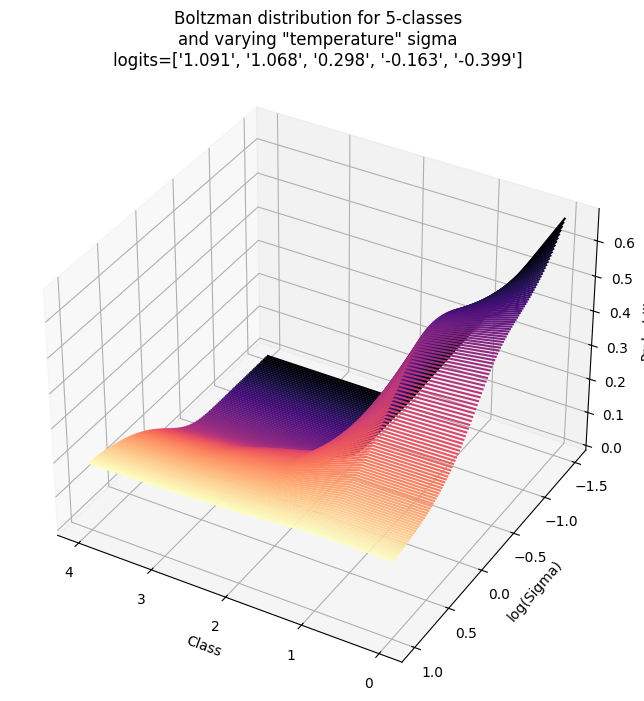

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def gibbs_prob_dist(energies, sigma):
    if sigma == 0:
        probs = np.zeros(len(energies))
        probs[np.argmin(energies)] = 1.0
        return probs
    unnormalized_probs = np.exp(energies / sigma) 
    return unnormalized_probs / np.sum(unnormalized_probs)

k = 5 
sigmas = np.logspace(-1.5, 1, 120) 
energies = np.random.normal(0, 1, k)  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
classes = np.arange(k)

colors = cm.magma(np.linspace(0, 1, len(sigmas)))

for i, (sigma, color) in enumerate(zip(sigmas, colors)):
    probs = gibbs_prob_dist(energies, sigma)
    ax.plot(classes, np.log10([sigma] * k), probs, color=color, label=f'sigma={sigma:.2f}') 

ax.set_xlabel('Class')
ax.set_ylabel('log(Sigma)')
ax.set_zlabel('Probability')
logits = [f"{logit:.3f}" for logit in energies]
ax.set_title(f'Boltzman distribution for {k}-classes\nand varying "temperature" sigma\nlogits={logits}')

ax.set_xticks(classes)
ax.set_xticklabels(classes.astype(int))  

ax.view_init(elev=35, azim=120)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1307110/4025871804.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


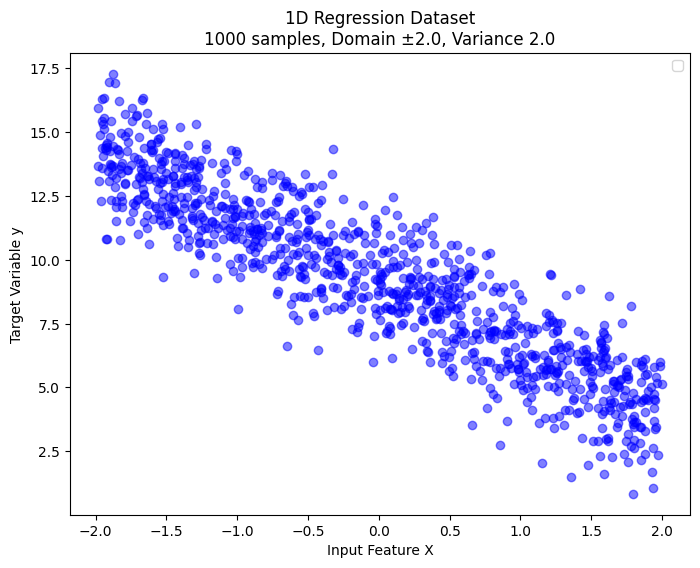

In [2]:
import matplotlib.pyplot as plt
from datasets import generate_1d_regression_data

x, y = generate_1d_regression_data(n_samples=1000, domain_range=2.0, variance=2.0)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title(f'1D Regression Dataset\n{1000} samples, Domain ±{2.0}, Variance {2.0}')
plt.xlabel('Input Feature X')
plt.ylabel('Target Variable y')
plt.legend()
plt.show()

5.224822252631982


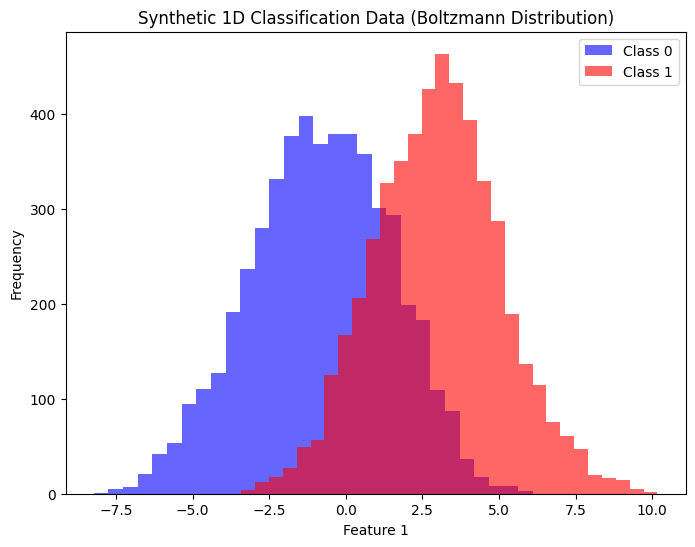

5.130071759224598


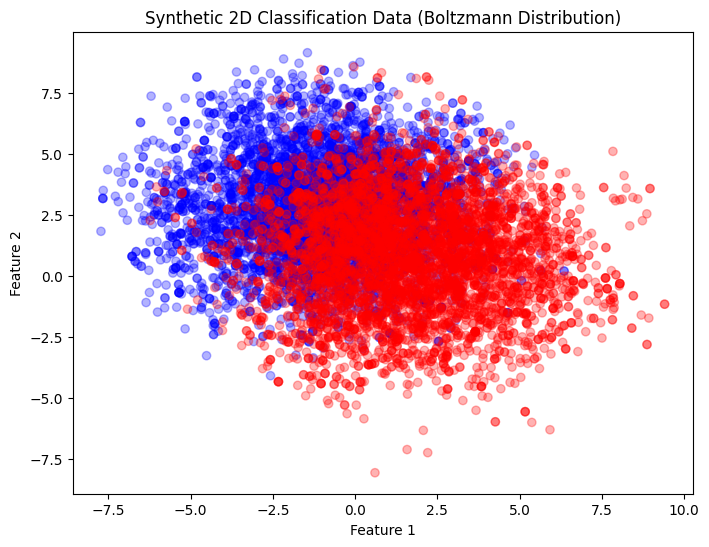

In [6]:
import numpy as np
from datasets import generate_boltzmann_classification_data

n_samples = 10000
variance = 5.0

x_1d, y_1d = generate_boltzmann_classification_data(n_samples=n_samples, variance=variance, n_features=1)
print(np.cov(x_1d[y_1d == 0, 0]))

plt.figure(figsize=(8, 6))
plt.hist(x_1d[y_1d == 0, 0], bins=30, alpha=0.6, color='blue', label='Class 0')
plt.hist(x_1d[y_1d == 1, 0], bins=30, alpha=0.6, color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Synthetic 1D Classification Data (Boltzmann Distribution)')
plt.legend()
plt.show()

x_2d, y_2d = generate_boltzmann_classification_data(n_samples=n_samples, variance=variance, n_features=2)
print(np.cov(x_2d[y_2d == 0, 0]))

plt.figure(figsize=(8, 6))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c=y_2d, cmap='bwr', alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic 2D Classification Data (Boltzmann Distribution)')
plt.show()

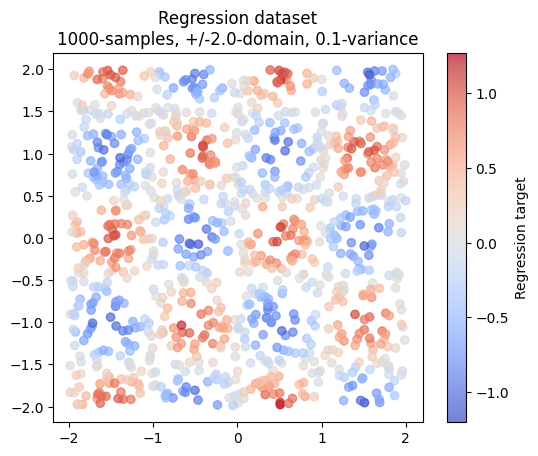

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_regression_dataset(samples=1000, domain_range=2.0, variance=0.1, seed=42):
    np.random.seed(seed)
    x1 = np.random.uniform(-domain_range, domain_range, samples)
    x2 = np.random.uniform(-domain_range, domain_range, samples)
    x = np.column_stack((x1, x2))
    y = np.sin(x1 * np.pi) * np.cos(x2 * np.pi) + np.random.normal(0, variance, samples)
    return x, y

samples = 1000
domain_range = 2.0
variance = 0.1

x, y = generate_regression_dataset(samples, domain_range, variance)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Regression target')
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'Regression dataset\n{samples}-samples, +/-{domain_range}-domain, {variance}-variance')
plt.show()


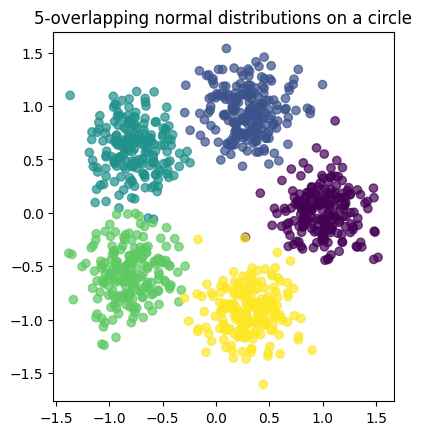

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_mixture_on_circle(n_classes=3, samples_per_class=100, radius=5.0, variance=1.0, seed=42):
    x, y = [], []
    
    np.random.seed(seed)
    angles = np.linspace(0, 2 * np.pi, n_classes, endpoint=False)
    
    for i, angle in enumerate(angles):
        mean = np.array([radius * np.cos(angle), radius * np.sin(angle)])
        covariance = np.eye(2) * variance
        samples = np.random.multivariate_normal(mean, covariance, samples_per_class)
        x.append(samples)
        y.append(np.full(samples_per_class, i))
    
    return np.vstack(x), np.hstack(y)

radius = 1.0
n_classes = 5
variance = 0.05
samples_per_class = 200

x, y = generate_gaussian_mixture_on_circle(n_classes, samples_per_class, radius, variance) 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"{n_classes}-overlapping normal distributions on a circle")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

repeats = 3
true_vars = np.logspace(-3, 0, 10)
# sample_sizes = [8000, 12000, 15000, 18000, 20000]
# colors = plt.cm.magma(np.linspace(0.2, 0.8, len(sample_sizes)))

# batch_sizes = [1, 2, 4, 8, 32, 64, 128, 256, 512]
# colors = plt.cm.magma(np.linspace(0.1, 1, len(batch_sizes)))

epochs = [n for n in range(3, 21)]
colors = plt.cm.magma(np.linspace(0.1, 1, len(epochs)))

# for i, sample_size in enumerate(sample_sizes):
# for i, batch_size in enumerate(batch_sizes):
for i, epoch in enumerate(epochs):
    device = torch.device('cpu')
    # device = torch.device('cuda' if torch.cuda.is_available() and batch_size >= 128 else 'cpu')

    learned_vars = np.zeros_like(true_vars)
    std_learned_vars = np.zeros_like(true_vars)
    
    for j, variance in enumerate(true_vars):
        # print(f"{i + 1} / {len(batch_sizes)} - {j + 1} / {len(true_vars)}")
        print(f"{i + 1} / {len(epochs)} - {j + 1} / {len(true_vars)}")
        log_vars = run(variance, n_samples=1000, epochs=epoch, lr=1e-1, repeats=repeats, batch_size=2, device=device, uncertainty_weighing=True)
        
        std_learned_vars[j] = np.std(log_vars)
        learned_vars[j] = np.mean(log_vars)

    plt.plot(true_vars, learned_vars, color=colors[i], alpha=0.7, label=f'num epochs: {epoch}')
    plt.errorbar(true_vars, learned_vars, yerr=std_learned_vars, color=colors[i], elinewidth=1, capsize=1, alpha=0.2)

plt.plot(true_vars, true_vars, c='gray', alpha=0.3, label='ideal')
plt.title(f'True vs learned variance using uncertainty weighing')
plt.xlabel('True variance')
plt.ylabel('Learned variance')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from models import LinearRegressionModel
from datasets import generate_1d_regression_data
import scipy.stats as stats

plt.figure(figsize=(8, 6))

REPEATS = 3
BATCH_SIZE = 256

lrs = np.logspace(-2.0, 0.4, 12)
true_vars = np.logspace(-2.0, 0.5, 12)
gofs = np.zeros((len(lrs), len(lrs)))
colors = plt.cm.magma(np.linspace(0.1, 1, len(lrs)))

for i, lr_weights in enumerate(lrs):

    print(f'{i + 1} / {len(lrs)}')
    for k, lr_uw in enumerate(lrs):
        
        learned_vars = np.zeros_like(true_vars)
        
        for j, variance in enumerate(true_vars):

            sample_vars = run(
                variance,
                data_generator=generate_1d_regression_data,
                model_class=LinearRegressionModel,
                epochs=1,
                batch_size=BATCH_SIZE,
                n_samples=BATCH_SIZE*3000,
                repeats=REPEATS,
                lr=(lr_weights, lr_uw),
                uncertainty_weighing=True
            )

            learned_vars[j] = np.mean(sample_vars)
        
        gofs[i][k] = mae(np.log(true_vars), np.log(learned_vars))

gofs_transformed = np.cbrt(np.clip(gofs, 0, 5))

plt.figure(figsize=(10, 8))
plt.imshow(gofs_transformed, aspect='auto', cmap='magma', origin='lower', extent=[lrs.min(), lrs.max(), lrs.min(), lrs.max()])
cbar = plt.colorbar(label='Transformed Mean Absolute Error (cube root)')
cbar.set_ticks([np.min(gofs_transformed), np.cbrt(1), np.cbrt(5)])
cbar.set_ticklabels(['0', '1', '5'])
plt.xlabel('Learning Rate for Uncertainty Weight')
plt.ylabel('Learning Rate for Model Parameters')
plt.title('Goodness of Fit (MAE) for Varying Learning Rates')
plt.show()